In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RD_Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing_Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     uint8  
 5   State_New York   50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


In [9]:
df.rename(columns={'State_New York': 'State_New_York'}, inplace = True)

In [10]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
df.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
Profit             0
State_Florida      0
State_New_York     0
dtype: int64

RD_Spend


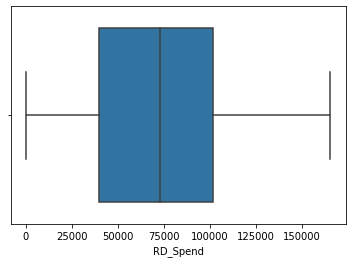

Administration


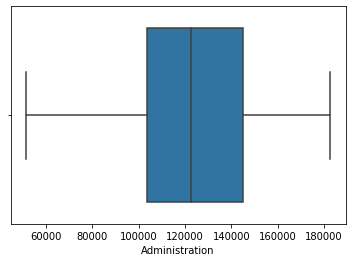

Marketing_Spend


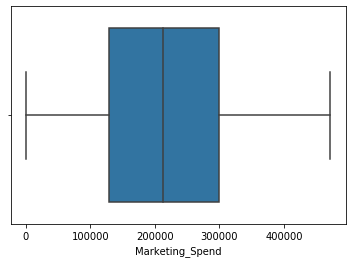

Profit


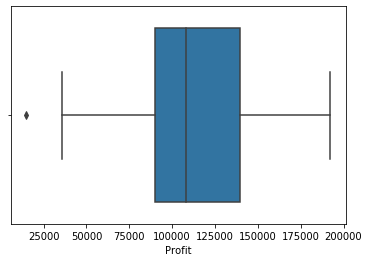

State_Florida


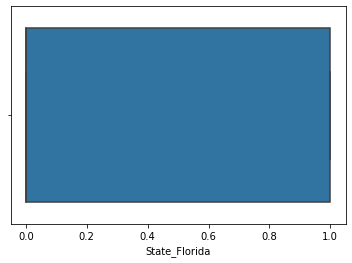

State_New_York


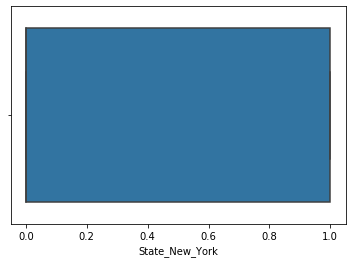

In [12]:
for i in df.columns:
    sns.boxplot(i, data=df)
    print(i)
    plt.show()

### From the Boxplots we can say that only in Profit column there are outliers

In [13]:
df['Profit'].min()

14681.4

RD_Spend


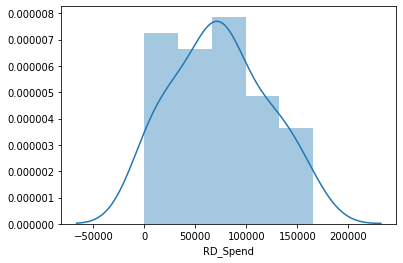

Administration


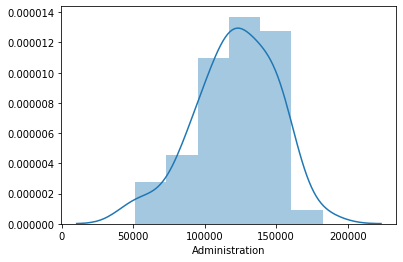

Marketing_Spend


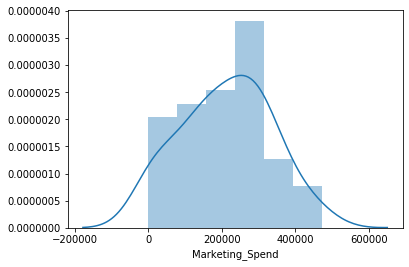

Profit


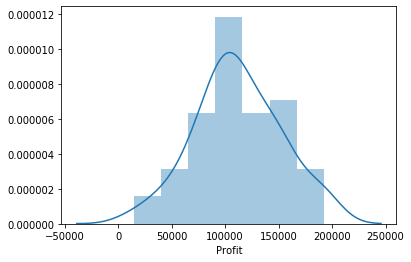

State_Florida


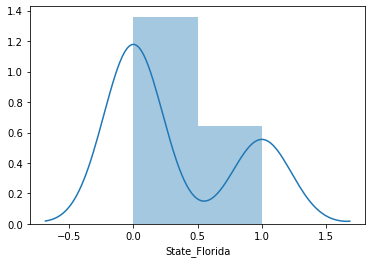

State_New_York


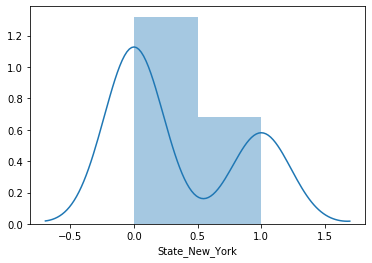

In [14]:
for i in df.columns:
    sns.distplot(df[i])
    print(i)
    plt.show()

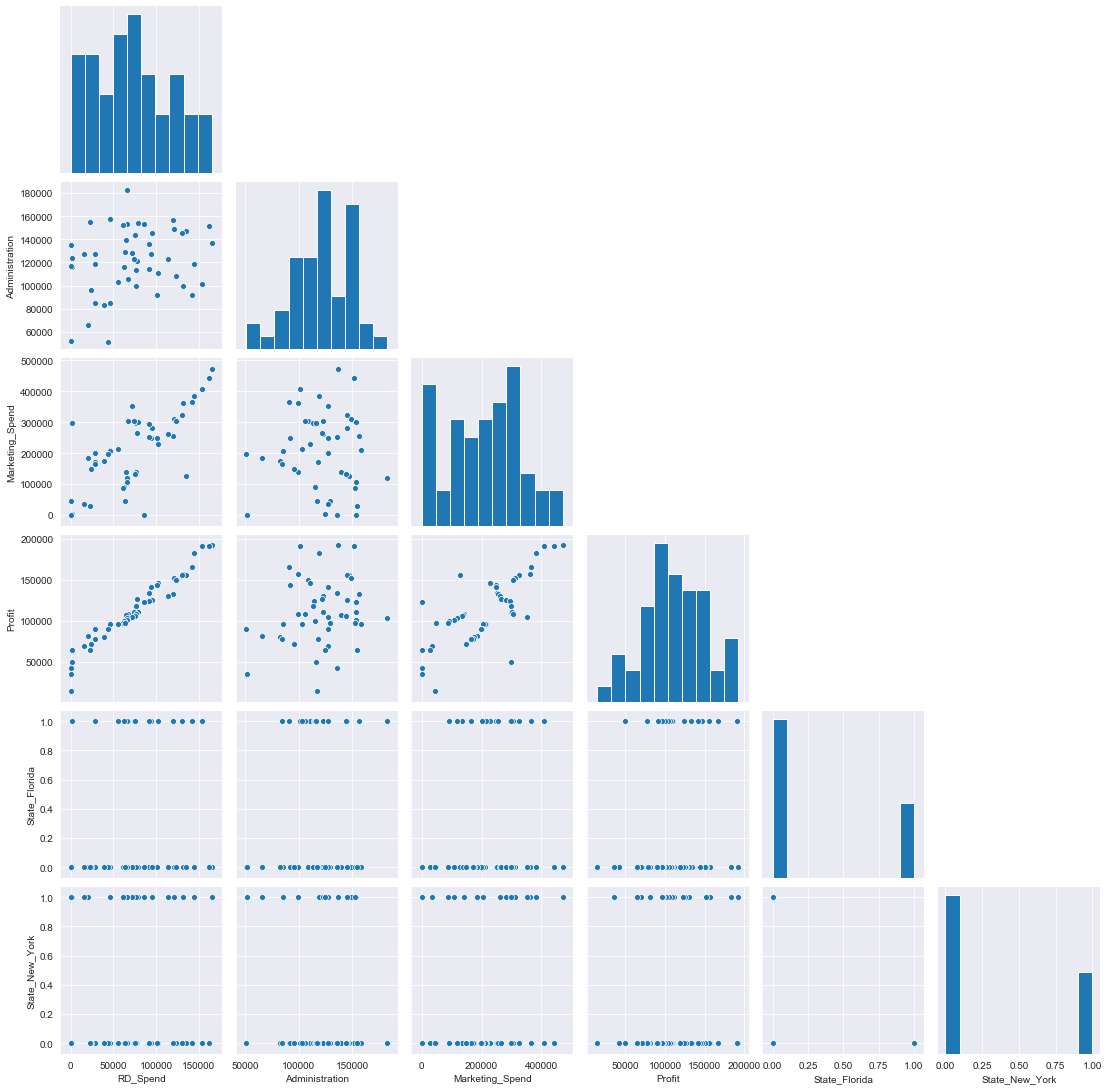

In [15]:
sns.set_style(style='darkgrid')
df_attr = df.iloc[:, :]
sns.pairplot(df_attr, corner=True, diag_kind='auto')
plt.show()

In [16]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_New_York
RD_Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New_York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


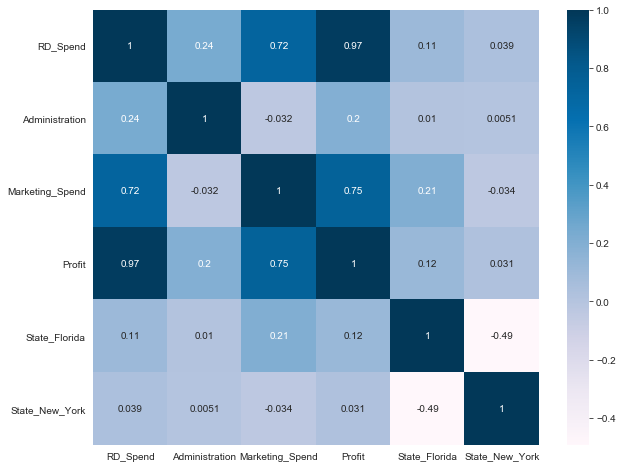

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='PuBu')
plt.show()

In [18]:
formula = 'Profit ~ RD_Spend + Marketing_Spend + Administration'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        17:08:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_influence = model.get_influence()
(val, _) = model_influence.cooks_distance

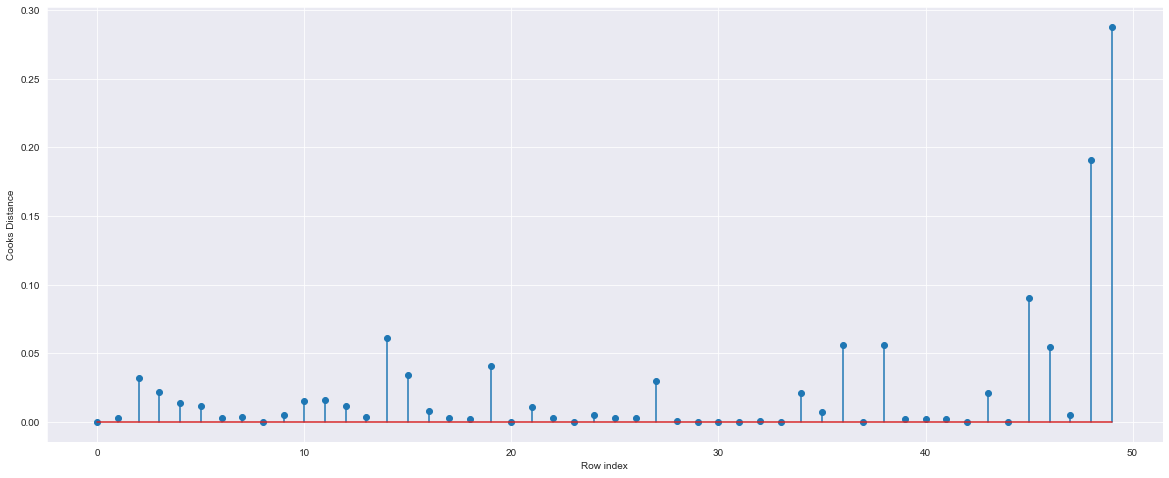

In [20]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df)), np.round(val, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
(np.argmax(val),np.max(val))

(49, 0.2880822927543268)

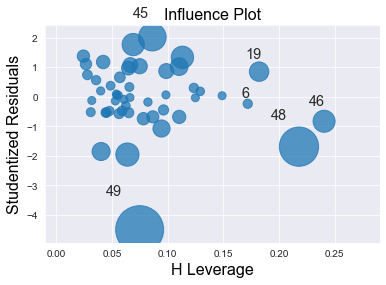

In [22]:
influence_plot(model)
plt.show()

In [23]:
leverage_cutoff = 3*((df.shape[1] + 1)/df.shape[0])
leverage_cutoff

0.42000000000000004

In [24]:
df[df.index.isin([49, 48])]

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_New_York
48,542.05,51743.15,0.00,35673.41,0,1
49,0.00,116983.80,45173.06,14681.40,0,0


In [25]:
df20 = df.copy()

In [26]:
df20 = df20.drop(df20.index[[48,49]],axis=0).reset_index()
df20 = df20.drop(['index'],axis=1)
df20.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [27]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         48 non-null     float64
 1   Administration   48 non-null     float64
 2   Marketing_Spend  48 non-null     float64
 3   Profit           48 non-null     float64
 4   State_Florida    48 non-null     uint8  
 5   State_New_York   48 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.7 KB


In [28]:
individual_rsquared_adj = pd.DataFrame(columns=['Name', 'Adj_Rsquared'])
individual_rsquared_adj

,Name,Adj_Rsquared


In [29]:
import statsmodels.formula.api as smf

# From Correlation we can see Profit has good correlation with R&D Spend

## So lets see how much accuracy we can get only with R&D Spend because it has 97% correlation with Profit

# Profit ~ RD Spend (0.957)

In [30]:
formula = 'Profit ~ RD_Spend'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1043.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.91e-33
Time:                        17:08:46   Log-Likelihood:                -496.29
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      46   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.312e+04   2227.718     23.844      0.000    4.86e+04    5.76e+04
RD_Spend       0.8142      0.025     32.303      0.000       0.763       0.865
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.265
Skew:                           0.031   Prob(JB):                        0.876
Kurtosis:                       2.642   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adj_Rsquared
0,Profit ~ RD_Spend,95.686015


# Profit ~ Marketing Spend (0.505)

In [32]:
formula = 'Profit ~ Marketing_Spend'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     49.01
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           9.10e-09
Time:                        17:08:46   Log-Likelihood:                -554.84
No. Observations:                  48   AIC:                             1114.
Df Residuals:                      46   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.672e+04   7923.084      8.421      0.000    5.08e+04    8.27e+04
Marketing_Spend     0.2235      0.032      7.000      0.000       0.159       0.288
==============================================================================
Omnibus:                        4.593   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.078
Skew:                          -0.348   Prob(JB):                        0.130
Kurtosis:                       4.246   Cond. No.                     5.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adj_Rsquared
0,Profit ~ RD_Spend,95.686015
1,Profit ~ Marketing_Spend,50.529580


# Profit ~ Administration (-0.009)

In [34]:
formula = 'Profit ~ Administration'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5683
Date:                Wed, 11 Oct 2023   Prob (F-statistic):              0.455
Time:                        17:08:46   Log-Likelihood:                -571.96
No. Observations:                  48   AIC:                             1148.
Df Residuals:                      46   BIC:                             1152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.691e+04   2.54e+04      3.816      0.000    4.58e+04    1.48e+05
Administration     0.1523      0.202      0.754      0.455      -0.254       0.559
==============================================================================
Omnibus:                        1.112   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                1.122
Skew:                           0.332   Prob(JB):                        0.571
Kurtosis:                       2.652   Cond. No.                     5.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
individual_rsquared_adj = individual_rsquared_adj.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
individual_rsquared_adj

,Name,Adj_Rsquared
0,Profit ~ RD_Spend,95.686015
1,Profit ~ Marketing_Spend,50.529580
2,Profit ~ Administration,-0.926957


In [36]:
combination_rsquare = pd.DataFrame(columns=['Name', 'Adj_Rsquared'])
combination_rsquare

,Name,Adj_Rsquared


## Let's see combination of RD_Spend and Marketing_Spend

# Profit ~ RD_Spend + Marketing_Spend (0.959)

In [37]:
formula = 'Profit ~ RD_Spend + Marketing_Spend'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.1
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.09e-32
Time:                        17:08:46   Log-Likelihood:                -494.44
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.127e+04   2376.280     21.574      0.000    4.65e+04    5.61e+04
RD_Spend            0.7695      0.034     22.636      0.000       0.701       0.838
Marketing_Spend     0.0241      0.013      1.899      0.064      -0.001       0.050
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.282
Skew:                           0.016   Prob(JB):                        0.868
Kurtosis:                       2.626   Cond. No.                     5.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
combination_rsquare = combination_rsquare.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
combination_rsquare

,Name,Adj_Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,95.917474


# Profit ~ RD_Spend + Marketing_Spend + Administration (0.960)

In [39]:
formula = 'Profit ~ RD_Spend + Marketing_Spend + Administration'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.03e-31
Time:                        17:08:46   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
combination_rsquare = combination_rsquare.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
combination_rsquare

,Name,Adj_Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,95.917474
1,Profit ~ RD_Spend + Marketing_Spend + Administ...,96.013184


# Profit ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York (0.958)

In [41]:
formula = 'Profit ~ RD_Spend + Marketing_Spend + Administration +  State_Florida + State_New_York'
model = smf.ols(formula, data=df20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           7.02e-29
Time:                        17:08:46   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.939e+04   6093.634      9.746      0.000    4.71e+04    7.17e+04
RD_Spend            0.7888      0.037     21.160      0.000       0.714       0.864
Marketing_Spend     0.0179      0.014      1.275      0.209      -0.010       0.046
Administration     -0.0621      0.045     -1.381      0.174      -0.153       0.029
State_Florida   -1150.1897   2712.520     -0.424      0.674   -6624.276    4323.896
State_New_York   -665.7875   2678.779     -0.249      0.805   -6071.783    4740.208
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
combination_rsquare = combination_rsquare.append({'Name' : formula, 'Adj_Rsquared': model.rsquared_adj*100}, ignore_index = True)
combination_rsquare

,Name,Adj_Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,95.917474
1,Profit ~ RD_Spend + Marketing_Spend + Administ...,96.013184
2,Profit ~ RD_Spend + Marketing_Spend + Administ...,95.841296


# VIF

In [43]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_Florida', 'State_New_York'],
      dtype='object')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df20[['RD_Spend', 'Administration', 'Marketing_Spend']]
variables.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [45]:
vif = pd.DataFrame()
vif

""


In [46]:
vif_results = pd.DataFrame(columns=['Name', 'Without_Column', 'VIF_value','Adj_Rsquared'])
vif_results

,Name,Without_Column,VIF_value,Adj_Rsquared


In [47]:
variables.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [48]:
variables.shape[1]

3

In [49]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,8.621368,RD_Spend
1,4.266221,Administration
2,7.596224,Marketing_Spend


In [50]:
vif['VIF'].max()

8.621367699254641

## VIF is Variance Inflation Factor 
## VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem

#### We should also not remove all the columns which have VIF more than 10 at one shot we have to do it in one after another in Descending to Ascending order.

### But we don't have any VIF value greater than 10, So we can go for directly Linear Regression Algorithm.

# -----------------------------------------------------------------------------------------------

## Let's take all columns for algorithm

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
final_results = pd.DataFrame(columns=['Name', 'Train_Result', 'Test_Result'])

# Normal Transformation

In [53]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit',
       'State_Florida', 'State_New_York'],
      dtype='object')

In [54]:
X = df20[['RD_Spend', 'Administration', 'Marketing_Spend']]
y = df20[['Profit']]

In [55]:
X.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [56]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [58]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33, 3) (15, 3) (33, 1) (15, 1)


In [59]:
multiLR_model= LinearRegression()
multiLR_model.fit(X_train, y_train)

LinearRegression()

In [60]:
multiLR_model.coef_

array([[0.75437126, 0.00928064, 0.03178967]])

In [61]:
X_train.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

In [62]:
enumerate(X_train.columns)

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model.coef_[0][idx]))

The coefficient for RD_Spend is 0.7543712625170216
The coefficient for Administration is 0.009280644569842053
The coefficient for Marketing_Spend is 0.03178967057849258


In [64]:
intercept = multiLR_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 49461.845788406645


In [65]:
train_score = multiLR_model.score(X_train, y_train)
train_score

0.9626616600725412

In [66]:
test_score = multiLR_model.score(X_test, y_test)
test_score

0.9544683447047251

In [67]:
df1 = df20[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']]
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [68]:
df1['y_pred'] = multiLR_model.predict(X)
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred
0,165349.20,136897.80,471784.10,192261.83,190464.891496
1,162597.70,151377.59,443898.53,191792.06,187637.147667
2,153441.51,101145.55,407934.54,191050.39,179120.511953
3,144372.41,118671.85,383199.62,182901.99,171655.383939
4,142107.34,91391.77,366168.42,166187.94,169152.087259


In [69]:
df1['Error'] = df1['Profit'] - df1['y_pred']
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred,Error
0,165349.20,136897.80,471784.10,192261.83,190464.891496,1796.938504
1,162597.70,151377.59,443898.53,191792.06,187637.147667,4154.912333
2,153441.51,101145.55,407934.54,191050.39,179120.511953,11929.878047
3,144372.41,118671.85,383199.62,182901.99,171655.383939,11246.606061
4,142107.34,91391.77,366168.42,166187.94,169152.087259,-2964.147259


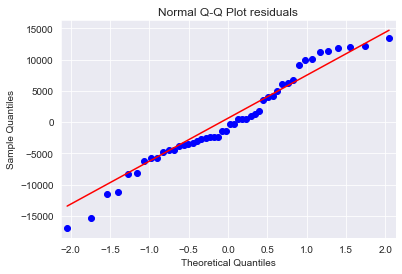

In [70]:
import statsmodels.api as sm
sm.qqplot(df1['Error'], line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [71]:
final_results = final_results.append({'Name': 'Normal Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,96.266166,95.446834


## Final result in Train we got is 96.2% and inTest we got 95.4%

In [72]:
combination_rsquare

,Name,Adj_Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,95.917474
1,Profit ~ RD_Spend + Marketing_Spend + Administ...,96.013184
2,Profit ~ RD_Spend + Marketing_Spend + Administ...,95.841296


# From different combinations we achieved best Adjusted R^2 value with Profit ~ RD_Spend + Marketing_Spend + Administration and score is 96%